### Student details

Student name: Elsa Anza Martín

Student ID: 21272808

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [3]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

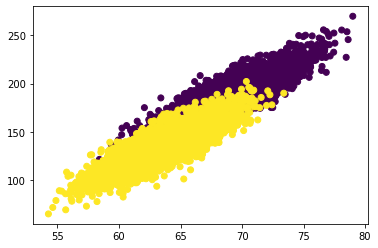

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [5]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [6]:
################################
# Your code here
from sklearn.naive_bayes import GaussianNB

gender_model = GaussianNB().fit(X_train, y_train)
y_pred= gender_model.predict(X_test)

In [7]:
p_model=Perceptron()

In [8]:
p_model.train(X_train, y_train)

In [9]:
y_pred=p_model.predict(X_test)
y_pred

array([ 1, -1,  1, ...,  1,  1,  1])

In [10]:
print(X_test) #test data
print()
print(y_pred) #predicted values for the test group
print(y_test) #

[[ 68.68723219 173.11581259]
 [ 68.82933377 195.1620421 ]
 [ 66.39812838 170.21745116]
 ...
 [ 63.95730896 127.44497002]
 [ 61.43011255 131.18192954]
 [ 62.45074489 138.80165645]]

[ 1 -1  1 ...  1  1  1]
[ 1 -1 -1 ...  1  1  1]


In [11]:
y_test

array([ 1, -1, -1, ...,  1,  1,  1])

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [12]:
################################
# Your code here

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8545454545454545


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

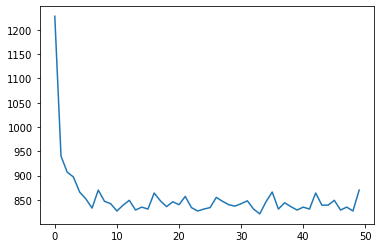

In [13]:
################################
# Your code here

x = range(len(p_model.errors_))
plt.plot(x, p_model.errors_)

In [15]:
weights = np.random.normal(loc=161, scale=32.10, size=5000) #loc = mean, scale = std, size = no samples
weights[0:20]
heights = np.random.normal(loc=66.36, scale=3.84, size=5000) #loc = mean, scale = std, size = no samples
heights[0:20] #print 20 first generated values

array([66.16593398, 64.09454594, 62.42647758, 77.95241644, 67.75736176,
       72.038769  , 68.07353393, 64.42278321, 60.81462976, 62.26319989,
       67.70866494, 65.09256952, 70.10222132, 65.24061066, 65.8724759 ,
       65.20579128, 63.54099912, 66.23532351, 73.09756368, 71.12774756])

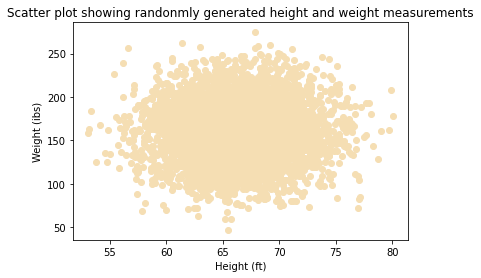

In [16]:
x = heights
y = weights
plt.scatter(x, y, color = 'wheat')

#x = data_male['Height']
#y = data_male['Weight']
#plt.scatter(x, y, color = 'powderblue')

plt.xlabel("Height (ft)")
plt.ylabel("Weight (ibs)")

plt.title("Scatter plot showing randonmly generated height and weight measurements")


plt.show()

In [17]:
new_X = pandas.DataFrame(heights, columns=['Heights'])
new_X['Weights'] = weights
new_X

,Heights,Weights
0,66.165934,105.917621
1,64.094546,170.811200
2,62.426478,125.517119
3,77.952416,193.322167
4,67.757362,116.656858
...,...,...
4995,63.470060,130.960741
4996,71.519046,152.581570
4997,65.177416,192.312810
4998,66.295104,134.501316


In [18]:
new_y_pred= p_model.predict(new_X)

In [19]:
new_X['Prediction'] = new_y_pred

In [20]:
new_X

,Heights,Weights,Prediction
0,66.165934,105.917621,1
1,64.094546,170.811200,-1
2,62.426478,125.517119,1
3,77.952416,193.322167,1
4,67.757362,116.656858,1
...,...,...,...
4995,63.470060,130.960741,1
4996,71.519046,152.581570,1
4997,65.177416,192.312810,-1
4998,66.295104,134.501316,1


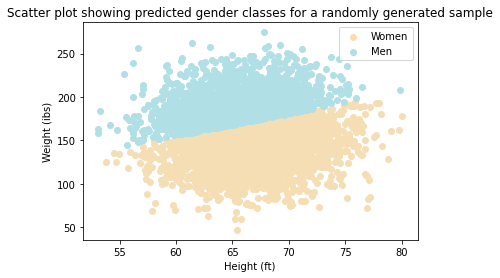

In [21]:
data_female = new_X.loc[new_X['Prediction'] == 1]
data_male = new_X.loc[new_X['Prediction'] == -1]
x = data_female['Heights']
y = data_female['Weights']
plt.scatter(x, y, color = 'wheat')

x = data_male['Heights']
y = data_male['Weights']
plt.scatter(x, y, color = 'powderblue')

plt.xlabel("Height (ft)")
plt.ylabel("Weight (ibs)")

plt.title("Scatter plot showing predicted gender classes for a randomly generated sample")
plt.legend(['Women', 'Men'])

plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 

In the visualization of errors we can see that the training data experiments a significant drop at first from 1200 to 850, and then procedes to zig-zag around 850 for the rest of the run.
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?

Our best results are actually achieved within the first 10 epochs, since there is no significant improvement after this. 
3.	Why can’t we get zero error with this data?

What I can guess from the results is that more features are needed to accuratly classify to genders, so it's not a problem of model complexity. This might converge faster than Naive Bayes, but we're still missing data and my guess is two features are not enough to classify with 100% accuracy a person's gender.